## Simple example of the EGCI calculation

In [1]:
import numpy as np
from infromation_theory_utils import JSD, Entropy, autocorr_coef, n_components_95
import pandas as pd
import soundfile as sf
import os
from scipy.linalg import svd, toeplitz
from scipy.stats import zscore
from statsmodels.tsa.stattools import acf, pacf
    
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

This notebook shows how to calculate the EGCI index for some anuran calls of different species. The call of each species is represented in the HxC complexity plane. These recordings have a different duration, but they can all be characterized on the same HxC plane, highlighting one of the main advantages of this index.

### Loading the upper and lower boundaries.

In [2]:
lag = 256 

cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')

### Plotting one audio sample in .wav format

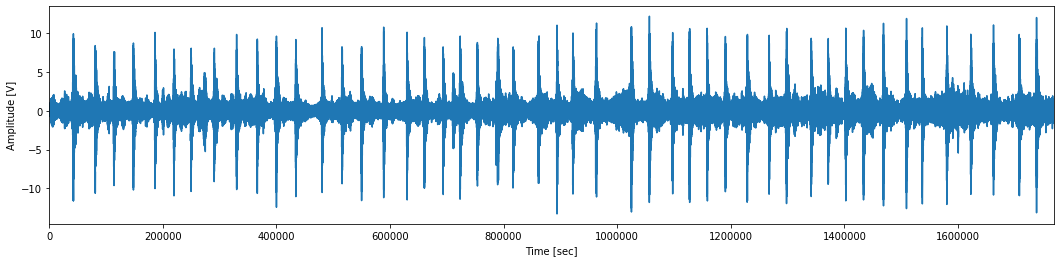

In [3]:
datapath = './wav_files/'
x, fs = sf.read(datapath + 'Adenomera andre.wav')
x = zscore(x)

plt.figure(figsize=(18,4))
plt.plot(x)
plt.xlim([0,len(x)])
plt.ylabel('Amplitude [V]')
plt.xlabel('Time [sec]')
plt.show()

### EGCI

Reading and processing all files in the folder and executing the steps of the algorithm described in the article https://www.biorxiv.org/content/10.1101/2020.02.09.940916v1

In [4]:
listing = os.listdir(datapath)

H = []
C = []
label = []

for file in listing:
    x, fs = sf.read(datapath + file)
    x = zscore(x)
    
    # Algorithm steps 
    rxx = acf(x, nlags=lag, unbiased=True, fft=True)
    Sxx = toeplitz(rxx)
    U, s, Vt = svd(Sxx)
    
    H.append(Entropy(s))              # Entropy
    C.append(Entropy(s)*JSD(s))       # Complexity, also called EGCI index
    label.append(file.split('.')[0])  # Species name

### Plotting the HxC plane

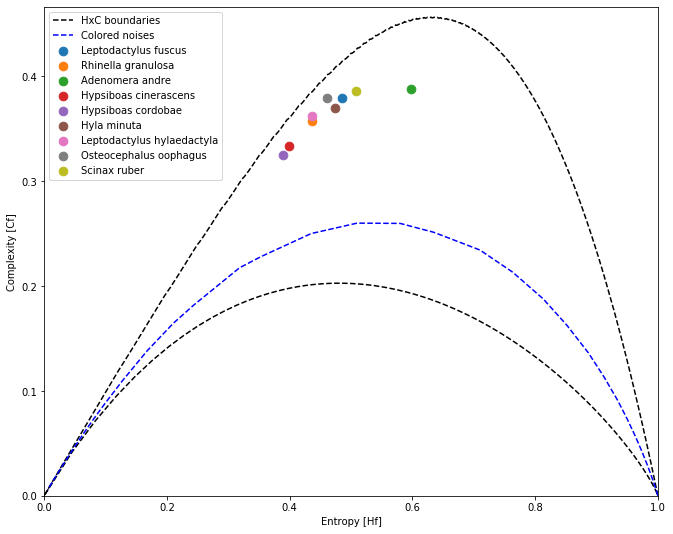

In [5]:
plt.figure(figsize=(11,9))

for i in range(len(H)):
    plt.scatter(H[i], C[i], marker='.', s=300, label = label[i])

plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [Cf]')
plt.xlabel('Entropy [Hf]')
plt.legend(loc = 'best')
plt.show()